In [29]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [30]:
sLogDir = "log"
ylim_loss = (0.0,5.0)

In [52]:
def acc_loss_show(sLogFile, sDescription, nEpoch = 1000):
    print(sDescription)
    
    dfLog = pd.read_csv(sLogDir + "/" + sLogFile)
    print("Validation set: max accuracy %.2f | min loss %.3f" % (dfLog.val_acc.max(), dfLog.val_loss.min()))
    print("\n", dfLog.tail())
    
    plt.plot(dfLog.epoch, dfLog.acc, label="Training accuracy")
    plt.plot(dfLog.epoch, dfLog.val_acc, label="Validation accuracy")

    plt.xlim((0,nEpoch))
    plt.ylim((0,1))
    plt.legend()
    plt.show()
    
    plt.plot(dfLog.epoch, dfLog.loss, label="Training loss")
    plt.plot(dfLog.epoch, dfLog.val_loss, label="Validation loss")

    plt.xlim((0,nEpoch))
    plt.ylim(ylim_loss)
    plt.legend()
    plt.show()
    
    return

Based on ChaLearn-35878in249: Retraining LSTM + new Dense layers, lr=1e-6 => worse then from scratch? 

     epoch       acc      loss   val_acc  val_loss
995    995  0.900000  0.557243  0.344444  2.216906
996    996  0.868571  0.618351  0.333333  2.223161
997    997  0.902857  0.558598  0.344444  2.225277
998    998  0.874286  0.580245  0.344444  2.226579
999    999  0.882857  0.596886  0.333333  2.222033


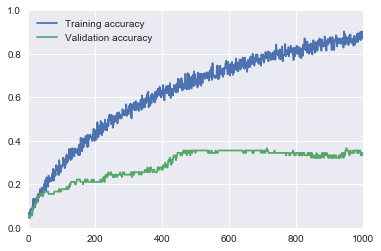

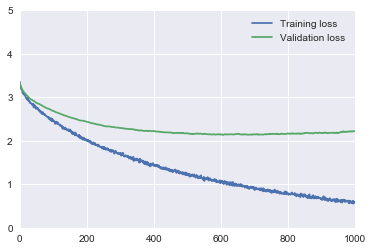

In [32]:
acc_loss_show("20180523-1450-transfer-440in21.acc",
             "Based on ChaLearn-35878in249: Retraining LSTM + new Dense layers, lr=1e-6 => worse then from scratch?")

Based on ChaLearn-35878in249: Freezing LSTM, new Dense layers, lr=1e-5 => pretty bad? 

     epoch       acc      loss   val_acc  val_loss
348    348  0.554286  1.496957  0.311111  2.309685
349    349  0.534286  1.509763  0.300000  2.307617
350    350  0.548571  1.478269  0.300000  2.308304
351    351  0.542857  1.516365  0.311111  2.309588
352    352  0.540000  1.528126  0.311111  2.308075


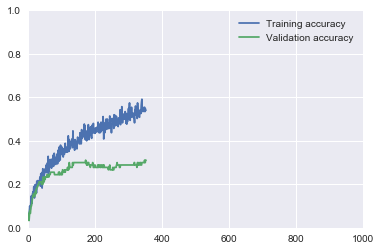

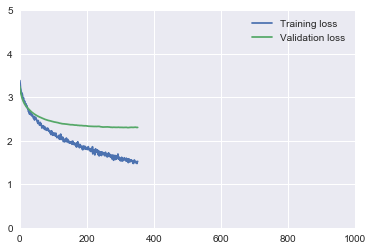

In [33]:
acc_loss_show("20180523-2021-transfer-440in21.acc", 
             "Based on ChaLearn-35878in249: Freezing LSTM, new Dense layers, lr=1e-5 => pretty bad?")

Based on ChaLearn-35878in249: Freezing LSTM, finetuning Dense_1, new Dense_softmax, lr=1e-6 => very disappointing 

     epoch       acc      loss   val_acc  val_loss
995    995  0.174286  2.873755  0.233333  2.661225
996    996  0.174286  2.926389  0.233333  2.660866
997    997  0.177143  2.862384  0.233333  2.660451
998    998  0.174286  2.926313  0.233333  2.660090
999    999  0.202857  2.809669  0.233333  2.659988


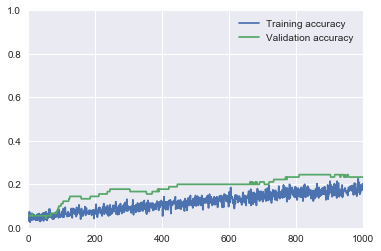

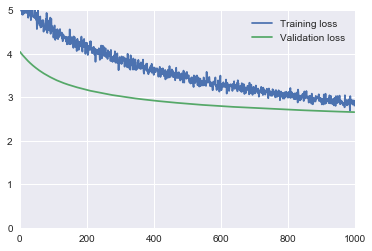

In [34]:
acc_loss_show("20180523-2133-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: Freezing LSTM, finetuning Dense_1, new Dense_softmax, lr=1e-6 => very disappointing")

Based on ChaLearn-35878in249: Freezing LSTM, finetuning Dense_1, new Dense_softmax, lr=1e-5 => still disappointing 

     epoch       acc      loss  val_acc  val_loss
995    995  0.580000  1.341136      0.3  2.329805
996    996  0.580000  1.315587      0.3  2.328949
997    997  0.560000  1.343861      0.3  2.328865
998    998  0.597143  1.274379      0.3  2.329537
999    999  0.582857  1.325952      0.3  2.329501


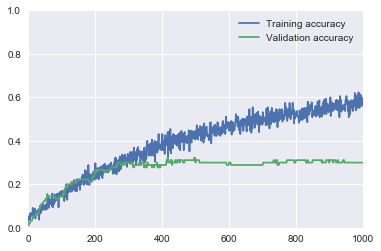

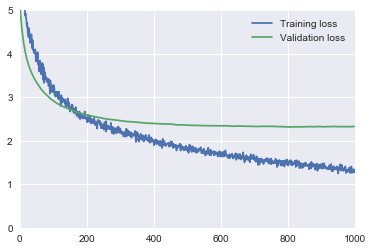

In [35]:
acc_loss_show("20180524-0553-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: Freezing LSTM, finetuning Dense_1, new Dense_softmax, lr=1e-5 => still disappointing")

### Try again

Based on ChaLearn-35878in249: retrain LSTM+Dense, lr=1e-4 => quickly at almost 40% but not more
Validation set: max accuracy 0.39 | min loss 2.195

     epoch       acc      loss   val_acc  val_loss
69     69  0.954286  0.172318  0.300000  3.417458
70     70  0.968571  0.158211  0.288889  3.489881
71     71  0.942857  0.173348  0.300000  3.376228
72     72  0.954286  0.182492  0.266667  3.473940
73     73  0.965714  0.125363  0.366667  3.316710


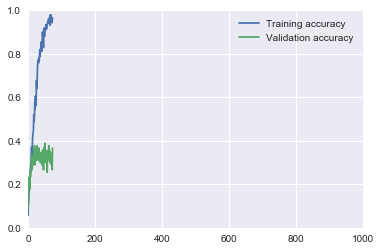

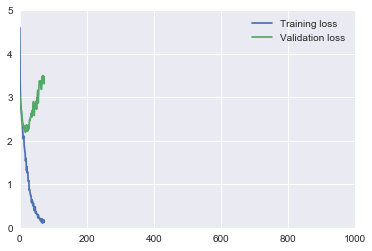

In [56]:
acc_loss_show("20180525-0829-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: retrain LSTM+Dense, lr=1e-4 => quickly at almost 40% but not more")

Based on ChaLearn-35878in249: retrain LSTM+Dense, lr=1e-5 => fast at almost 40% but not more
Validation set: max accuracy 0.40 | min loss 2.367

      epoch       acc      loss   val_acc  val_loss
383    383  0.957143  0.148173  0.333333  3.276951
384    384  0.962857  0.138375  0.366667  3.365818
385    385  0.954286  0.167655  0.377778  3.274406
386    386  0.954286  0.150444  0.366667  3.294523
387    387  0.948571  0.178614  0.355556  3.265504


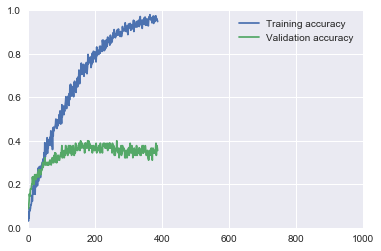

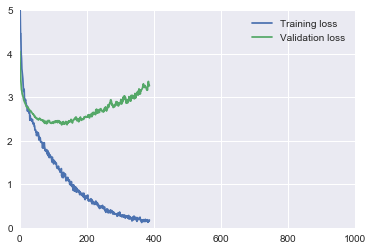

In [61]:
acc_loss_show("20180525-0855-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: retrain LSTM+Dense, lr=1e-5 => fast at almost 40% but not more")

Based on ChaLearn-35878in249: freeze LSTM, finetune Dense, lr=1e-5 => not yet peak, but disappointing
Validation set: max accuracy 0.29 | min loss 2.404

      epoch       acc      loss   val_acc  val_loss
495    495  0.417143  1.747981  0.288889  2.403903
496    496  0.451429  1.758531  0.288889  2.403748
497    497  0.445714  1.797546  0.288889  2.403947
498    498  0.437143  1.782440  0.288889  2.404086
499    499  0.408571  1.810958  0.288889  2.404307


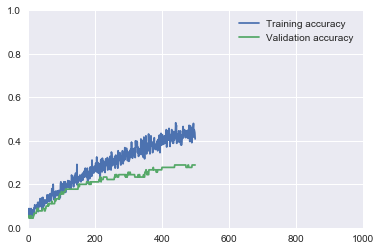

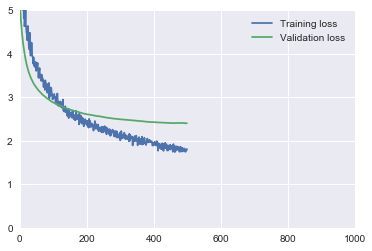

In [53]:
acc_loss_show("20180525-0844-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: freeze LSTM, finetune Dense, lr=1e-5 => not yet peak, but disappointing")

Based on ChaLearn-35878in249: freeze LSTM, finetune Dense, lr=1e-4 => slowly converging below 40%
Validation set: max accuracy 0.39 | min loss 2.414

      epoch       acc      loss   val_acc  val_loss
995    995  0.962857  0.176774  0.344444  3.633355
996    996  0.948571  0.162255  0.355556  3.653522
997    997  0.937143  0.194135  0.377778  3.656352
998    998  0.931429  0.193307  0.377778  3.653625
999    999  0.960000  0.195825  0.366667  3.664747


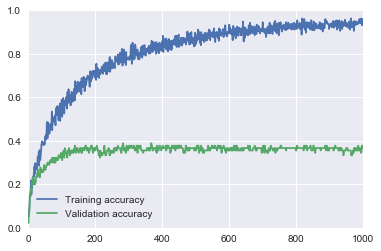

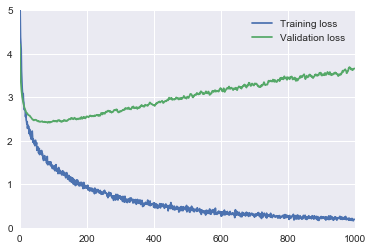

In [72]:
acc_loss_show("20180525-0919-transfer-440in21.acc", 
    "Based on ChaLearn-35878in249: freeze LSTM, finetune Dense, lr=1e-4 => slowly converging below 40%")

### Try stacked LSTM

ChaLearn-35878in249 with 2 LSTM: retrain entirely, lr=1e-4 => quick start, low loss, acc again <= 40%
Validation set: max accuracy 0.42 | min loss 1.992

     epoch       acc      loss   val_acc  val_loss
95     95  0.974286  0.285958  0.388889  2.100270
96     96  0.977143  0.281887  0.400000  2.099901
97     97  0.948571  0.301411  0.400000  2.088085
98     98  0.965714  0.272182  0.377778  2.095661
99     99  0.962857  0.281160  0.377778  2.102025


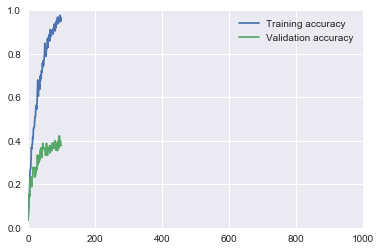

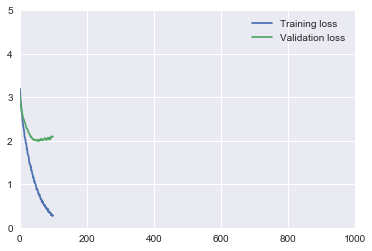

In [78]:
acc_loss_show("20180525-1303-transfer-440in21.acc", 
    "ChaLearn-35878in249 with 2 LSTM: retrain entirely, lr=1e-4 => quick start, low loss, acc again <= 40%")

ChaLearn-35878in249 with 2 LSTM: 1st frozen, 2nd LSTM finetuning, lr=1e-4 => also below 40%
Validation set: max accuracy 0.39 | min loss 2.022

      epoch       acc      loss   val_acc  val_loss
96      96  0.674286  1.222908  0.344444  2.043309
97      97  0.697143  1.185522  0.377778  2.029216
98      98  0.702857  1.155838  0.388889  2.022246
99      99  0.668571  1.178695  0.366667  2.041154
100    100  0.685714  1.144537  0.344444  2.040812


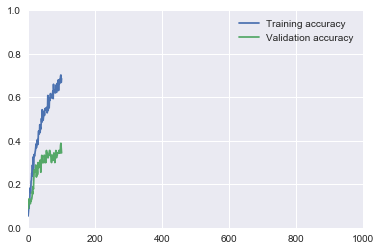

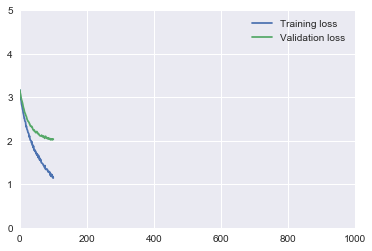

In [84]:
acc_loss_show("20180525-1313-transfer-440in21.acc", 
    "ChaLearn-35878in249 with 2 LSTM: 1st frozen, 2nd LSTM finetuning, lr=1e-4 => also below 40%")

ChaLearn-35878in249 with 2 LSTM: 1st frozen, 2nd LSTM finetuning, lr=1e-5 => no
Validation set: max accuracy 0.32 | min loss 2.265

      epoch       acc      loss   val_acc  val_loss
435    435  0.480000  1.816843  0.300000  2.270772
436    436  0.528571  1.799864  0.288889  2.269684
437    437  0.494286  1.805401  0.311111  2.266670
438    438  0.477143  1.833210  0.311111  2.265367
439    439  0.517143  1.803522  0.311111  2.265120


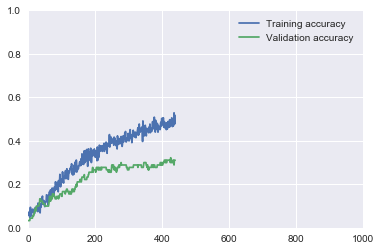

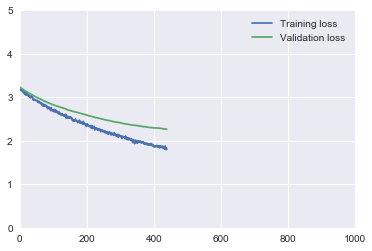

In [97]:
acc_loss_show("20180525-1331-transfer-440in21.acc", 
    "ChaLearn-35878in249 with 2 LSTM: 1st frozen, 2nd LSTM finetuning, lr=1e-5 => no")

ChaLearn-35878in249 with 2 LSTM: both frozen, lr=1e-4 => no :()
Validation set: max accuracy 0.32 | min loss 2.150

      epoch       acc      loss   val_acc  val_loss
232    232  0.720000  1.085706  0.300000  2.152516
233    233  0.702857  1.122605  0.300000  2.154267
234    234  0.657143  1.176231  0.300000  2.153454
235    235  0.685714  1.156275  0.311111  2.151319
236    236  0.711429  1.106486  0.300000  2.151357


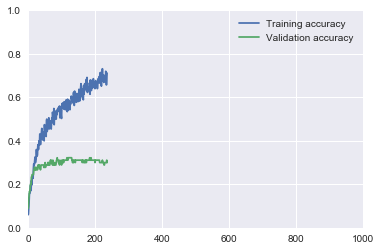

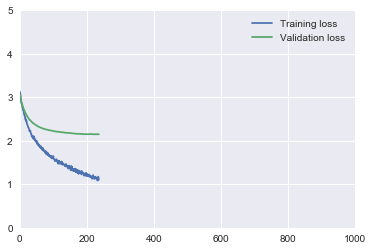

In [94]:
acc_loss_show("20180525-1320-transfer-440in21.acc", 
    "ChaLearn-35878in249 with 2 LSTM: both frozen, lr=1e-4 => no :()")